<a href="https://colab.research.google.com/github/soumyanamboo/Machine-Learning-Techniques/blob/main/RidgeRegularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge and Lasso Regularization
Polynomial regression is able to model non-linear relationship between features and labels. However higher order polynomial models are prone to overfitting.  
There are two ways to tackle the problem of overfitting.
1.   Train with more data
2.   Penalize the weight vector through regularization  
**Regularization:** Regularization leads to change in Linear Regression loss function, which in turn results in change of gradient calculation.   
The change in regularization rate results in a new model.For different values of regularization rate, we obtain a new model. Thus we have a problem of model selection at hand, where we need to choose the best model among the list of candidate models.  
Ridge and Lasso regularization solution path will be a function of regularization rate $λ$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import unittest
import itertools
import functools
import math
import pandas as pd

In [ ]:
#@title [Linear Regression Class Defenition]
class LinReg():
  ''' Linear Regression Model class definition
      y = X@w
      X: feature matrix
      w: weight vector
      y: label vector
  '''
  def __init__(self):
    self.t0 = 20
    self.t1 = 100
  
  def predict(self, X:np.ndarray):
    ''' Args:
          X: feature matrix
        Returns:
          y: label vector predicted by the given model
    '''
    y = X@self.w
    return y
  
  def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Calculates loss for a model based on known labels.
        Args:
          X: feature matrix
          y: label vector
          reg_rate: regularization rate
        Returns:
          Loss 
    '''
    e = y - self.predict(X)
    #return (1/2) * np.transpose(e)@e
    return (1/2) * np.transpose(e)@e + (reg_rate/2)*np.transpose(self.w)@self.w
  
  def rmse(self, X:np.ndarray, y:np.ndarray):
    ''' Calculates root mean squared error of prediction w.r.t actual label
        Args:
          X: feature matrix
          y: label vector
        Returns:
          Loss
    '''
    return np.sqrt((2/X.shape[0])* self.loss(X,y,0))
  
  def fit(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Estimate parameters of linear regression model w.r.t known labels.
        Args:
          X: feature matrix
          y: label vector
          reg_rate: rate of regression
        Returns:
          weight vector
    '''
    self.w = np.zeros(X.shape[1])
    eye = np.eye(np.size(X,1))
    self.w = np.linalg.solve(reg_rate*eye + X.T@X, X.T@y)
    return self.w
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
    ''' Calculates the gradient of loss function w.r.t weight vector
        Args:
          X: feature matrix
          y: label vector
          reg_rate: rate of regression
        Returns:
          gradient vector
    '''
    grad = np.transpose(X) @ (self.predict(X) - y) + reg_rate * self.w
    return grad
  
def update_weights(self, grad:np.ndarray, lr:float):
  ''' updates the weights based on the gradient of loss function
      w_new = w_old - lr * grad
      Args:
        grad: gradient of loss w.r.t w
        lr: learning rate
      Returns:
      updated weight vector
  '''
  w_new = self.w - lr * grad
  return w_new

def learning_schedule(self, t):
  return (self.t0/(t + self.t1))

def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float,reg_rate:float):
  ''' Estimates parameter of linear regression model using gradient descent
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        lr: learning rate
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
  '''
  self.w = np.zeros(X.shape[1])
  self.w_all = []
  self.err_all = []
  for i in np.arange(0, num_epochs):
    
    self.w_all.append(self.w)
    self.err_all.append(self.loss(X,y,0))
    
    grad = self.calculate_gradient(X,y,reg_rate)
    self.w = self.update_weights(grad,lr)
  return self.w

def mbgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int, reg_rate:float):
  ''' Estimates parameter of linear regression model using MBGD
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        batch_size: number of examples in a batch
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
  '''
  self.w = np.zeros(X.shape[1])
  self.w_all = []
  self.err_all = []
  mini_batch_id = 0

  for epoch in range(num_epochs):
    shuffled_indices = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, X.shape[0],batch_size):
      mini_batch_id += 1
      xi = X_shuffled[i:i+batch_size]
      yi = y_shuffled[i:i+batch_size]
      self.w_all.append(self.w)
      self.err_all.append(self.loss(xi,yi,0))

      grad = (2/batch_size) * self.calculate_gradient(X,y,reg_rate)
      lr = self.learning_schedule(mini_batch_id)
      self.w = self.update_weights(grad,lr)
  return self.w

def sgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, reg_rate:float):
  ''' Estimates parameter of linear regression model using Stochastic GD
      Args:
        X: feature matrix
        y: label vector
        num_epochs: number of iterations
        reg_rate: rate of regression
      Returns:
        weight vector: final weight vector
  '''
  self.w = np.zeros(X.shape[1])
  self.w_all = []
  self.err_all = []

  for epoch in range(num_epochs):
    for i in range(0, X.shape[0]):
      random_index = np.random.randint(X.shape[0])
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1]

      self.w_all.append(self.w)
      self.err_all.append(self.loss(xi,yi,0))

      grad = 2 * self.calculate_gradient(X,y,reg_rate)
      lr = self.learning_schedule(epoch *X.shape[0] + i)
      self.w = self.update_weights(grad,lr)
  return self.w


We will implement Ridge Regression using the below euations:  
1.   Loss function (loss): 
$J(w) = (\frac{1}{2} (Xw - y)^T(Xw-y) + \frac{λ}{2}w^Tw$
2.   Gradient calculation (calculate_gradient): 
$\frac{dJ(w)}{dw} = X^T(Xw-y) + λ w$  
3.   Normal equation (fit): 
$ w = (X^TX + λI)^{-1} X^Ty$.




In [ ]:
class TestLossFunction(unittest.TestCase):
  def test_loss_function(self):
    feature_matrix = np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector = np.array([1,1,1,1])
    label_vector = np.array([6,11])
    reg_rate = 0.01
    expected_loss = np.array([62.52])

    #call
    lin_reg = LinReg()
    lin_reg.w = weight_vector
    loss = lin_reg.loss(feature_matrix,label_vector,reg_rate)

    self.assertEqual(loss.shape, ())

    np.testing.assert_equal(expected_loss,loss)

unittest.main(argv=[''],defaultTest='TestLossFunction',verbosity=2,exit=False)

test_loss_function (__main__.TestLossFunction) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.011s

OK


In [ ]:
class TestCalculateGradient(unittest.TestCase):
  def test_calculate_gradient(self):
    feature_matrix = np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector = np.array([1,1,1,1])
    label_vector = np.array([6,11])
    reg_rate = 0.01
    expected_grad = np.array([15.01, 105.01, 50.01, 95.01])

    #call
    lin_reg = LinReg()
    lin_reg.w = weight_vector
    calculated_grad = lin_reg.calculate_gradient(feature_matrix,label_vector,reg_rate)

    self.assertEqual(calculated_grad.shape, (4,))

    np.testing.assert_equal(expected_grad,calculated_grad)

unittest.main(argv=[''],defaultTest='TestCalculateGradient',verbosity=2,exit=False)

test_calculate_gradient (__main__.TestCalculateGradient) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


In [ ]:
# create a training set by first calculating func(x) (here we use sin(2*pi*x)), and then add a small random noise having gaussian distribution

def non_linear_training_set(func, sample_size, std):
  x = np.linspace(0,1,sample_size)
  y = func(x) + np.random.normal(scale=std,size=x.shape)
  return x, y

def nonlin(x):
  return np.sin(2 * np.pi * x)

In [ ]:
def visualize_training_data(x_train, y_train):
  points = np.linspace(0,1,100)
  output = nonlin(points)
  plt.scatter(x_train, y_train,facecolor="none", edgecolor='b', s=50, label='training data')
  plt.plot(points, output,c='g',label="$sin(2 \pi x)$")
  plt.xlabel('$x$')
  plt.ylabel('y')
  plt.legend()
  plt.show

#x,y = non_linear_training_set(nonlin,100,0.2)
#visualize_training_data(x,y)


In [ ]:
def get_combinations(x, degree):
  return itertools.combinations_with_replacement(x, degree)

def compute_new_feature(items):
  return functools.reduce(lambda x, y: x*y, items) 

In [ ]:
def polynomial_transform(x, degree, logging=False):
  #convert feature to matrix
  if(x.ndim ==1):
    x = x[:,None]
  
  x_t = x.transpose()   # transpose of feature matrix
  features = [np.ones(len(x))] # populates 1's as first feature of each example

  if(logging):
    print('Input: ',x)
  
  for degree in range(1, degree + 1):
    for items in get_combinations(x_t,degree):  # generate combinations 
      features.append(compute_new_feature(items))  # combine features into new feature
      if(logging):
        print(items, ' : ', compute_new_feature(items))
  if(logging):
    print(np.asarray(features).transpose())
  return np.asarray(features).transpose()

In [ ]:
def visualize_model_fit(x, y, lin_reg, degree,reg_rate=0):
  ''' plots trained data along with data generation function'''
  points = np.linspace(0,1,100)
  output = nonlin(points)

  if(degree > 0):
    plt.scatter(x, y,facecolor="none",edgecolor='b',s=50,label='training data')
  plt.plot(points,output,color='g',label='$sin(2 \pi x)$')

  y_hat = lin_reg.predict(polynomial_transform(points,degree))
  plt.plot(points,y_hat,c='r',label='$h_\mathbf{w}(x)$')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.ylim(-1.5,1.5)
  plt.title('M={},reg_rate={}'.format(degree,reg_rate))
  #plt.legend()
  #plt.show()


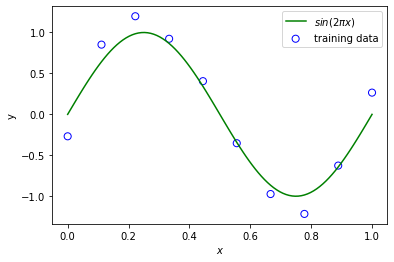

In [ ]:
num_samples = 10
degree = 9
x,y=non_linear_training_set(nonlin,num_samples,0.2)
visualize_training_data(x, y)

# x_transform = polynomial_transform(x,degree)
# lin_reg = LinReg()
# lin_reg.fit(x_transform, y,0)
# visualize_model_fit(x, y, lin_reg,degree)

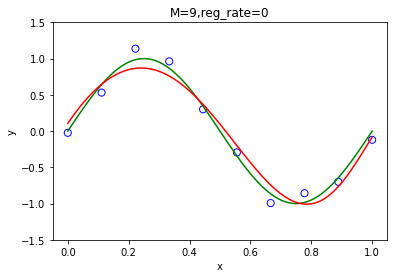

In [ ]:
num_samples = 10
degree = 9
reg_rate = 0.001
x,y=non_linear_training_set(nonlin,num_samples,0.2)
x_transform = polynomial_transform(x,degree)
lin_reg = LinReg()
lin_reg.fit(x_transform, y,reg_rate)
visualize_model_fit(x, y, lin_reg,degree)

**Model Selection:** One more model available per $λ$.   
The process to select model is:
*   Fix the list of $λ$ that you want to experiment with.
*   Divide the training data into training and validation.
*   for each $λ$,
    *  Train ridge regression model with $λ$ for traininng data.
    *  Calculate training and validation errors on the trained model.
*   select the one with lowest training and validation loss among all models.



In [ ]:
# Model selection helpers
import pandas as pd

def convert_dict_to_df(w_dict, degree):
  poly_w_dict = {i:np.array(np.zeros(degree)) for i in range(degree)}
  for deg in poly_w_dict:
    weight_vector = w_dict[deg]
    for i in range(len(weight_vector)):
      poly_w_dict[deg][i] = weight_vector[i]
    
  poly_w_df = pd.DataFrame(poly_w_dict)
  poly_w_df.columns = ['w_'+str(i) for i in range(degree)]
  return poly_w_df

def plot_model_selection(training_errors, val_errors):
  plt.plot(training_errors,'o-',mfc='none',mec='b',ms=10,label='training errors')
  plt.plot(val_errors,'o-',mfc='none',mec='r',ms=10,label='velidation errors')
  plt.legend()
  plt.xlabel('degree')
  plt.ylabel('RMSE')
  plt.show()

In [ ]:
training_errors = {}
val_errors  = {}
w_dict = {}
degree = 9
x,y = non_linear_training_set(nonlin,num_samples,0.2)

x_val = np.linspace(0,1,100)
y_val = nonlin(x_val) + np.random.normal(scale=0.25,size=len(x_val))
x_transform = polynomial_transform(x ,degree)
x_val_transform = polynomial_transform(x_val, degree)
for reg_rate in [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]:
  lin_reg = LinReg()
  lin_reg.fit(x_transform,y,reg_rate)

  w_dict[reg_rate] = lin_reg.w
  training_errors[reg_rate] = lin_reg.rmse(x_transform,y)
  val_errors[reg_rate] = lin_reg.rmse(x_val_transform, y_val)
err_df = pd.DataFrame([training_errors,val_errors]).T
w_df = pd.DataFrame(w_dict)
#plot_model_selection(training_errors,val_errors)



In [ ]:
#def plot_learning_curve(err_df):
#  err_df.columns = ["A","B"]
#  print(err_df["A"])
#  err_df.plot("A")
#  err_df.plot("B")

In [ ]:
#plot_learning_curve(err_df)

# Lasso Regression
Lasso uses $L_1$ norm of weight vector instead of $L_2$ as used in Ridge Regression

In [ ]:
from sklearn.linear_model import Lasso

reg_rate = 0.01
lasso = Lasso(alpha=reg_rate)
lasso.fit(x_transform, y)

#linear regression
lin_reg = LinReg()
_ = lin_reg.fit(x_transform,y,0)

In [ ]:
pd.DataFrame({'LinReg': lin_reg.w, 'Ridge': w_df[0.01], 'Lasso':lasso.coef_})

,LinReg,Ridge,Lasso
0,-0.103717,0.367216,0.000000
1,-45.612736,2.224039,0.000000
2,1237.760969,-4.106585,-2.448696
3,-11417.585337,-2.644742,-0.000000
4,54166.959538,-0.548564,-0.000000
5,-148219.000822,0.785831,0.000000
6,242104.966322,1.330385,0.000000
7,-232745.350477,1.313992,0.000000
8,121449.735942,0.953448,0.000000
9,-26531.764250,0.405277,1.722464


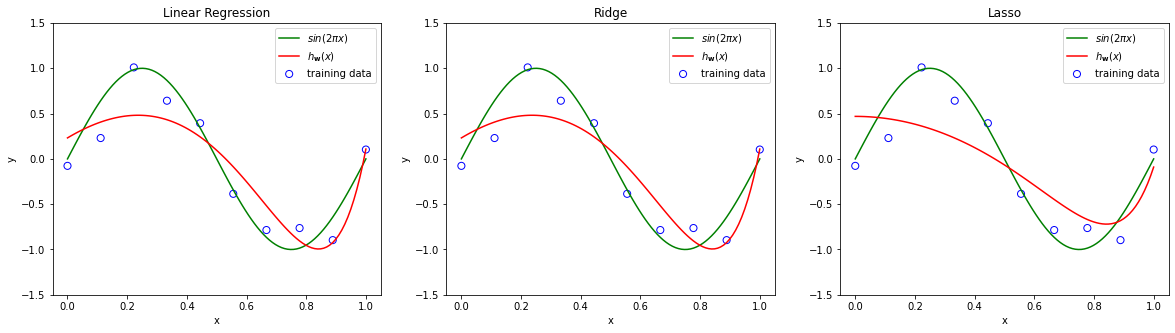

In [ ]:
f = plt.figure(figsize=(20,5))
ax1 = plt.subplot(1,3,1)
visualize_model_fit(x,y,lin_reg,degree,reg_rate=0)
plt.title('Linear Regression')
plt.legend()

lin_reg.w = w_df[0.01]
ax2 = plt.subplot(1,3,2)
visualize_model_fit(x, y, lin_reg,degree,reg_rate=0.01)
plt.title('Ridge')
plt.legend()

ax3 = plt.subplot(1,3,3)
visualize_model_fit(x, y, lasso, degree,reg_rate=0.01)
plt.title('Lasso')
plt.legend()